# Introduction to APIs

In this tutorial, we will explore the concept of APIs (Application Programming Interfaces) and how they are utilized in Python applications.

APIs play a crucial role in enabling communication between different software components, allowing them to exchange and transmit data and perform various operations

Picture the last time you used a web application where you had to enter your personal information into a form. You may have entered information like your name, address, phone number, and more. Once you hit the submit button, what happens next? How does that information get transmitted into a usable format for the application to use later on?

One way this can be accomplished is through the use of an API. It may help to think of an API as the waiter of the digital world. APIs are the go-betweens that ensure seamless communication between different software components, facilitating data exchange and operations.

Imagine going to a restaurant and placing an order. You provide your order, perhaps your entree and side dish choices and drink order, to the waiter, who then communicates your request to the kitchen. Once the kitchen has prepared your meal, the waiter brings it back to you. What happens when you hit the submit button in a web application, as mentioned above, is somewhat similar - the API acts like the waiter taking your data (order) and relays it in a digestible form to the software (kitchen) that processes it.

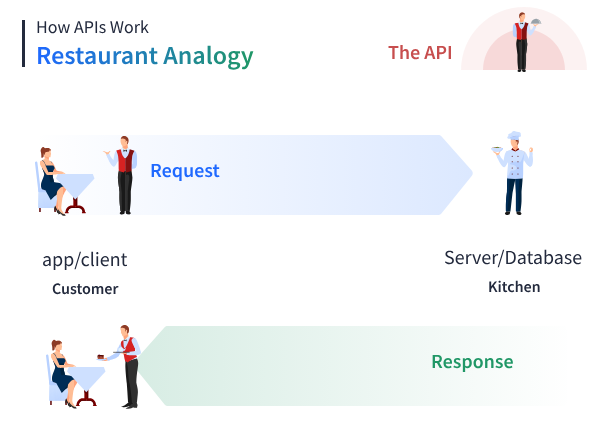

We will use the ExchangeRate API to access the latest currency rates for all countries. This API will act as our specialized waiter, bringing us the latest currency rates from all over the world. To see it in action, type the following URL into your browser and see what you get:

[APIs](https://api.exchangerate-api.com/v4/latest/usd)

Let’s break down and define a few key terms relating to APIs that will help us understand what happens when we access the above URL:

`API (Application Programming Interface)`: This is our waiter, a set of definitions and rules that allows different software components (like our tables and the kitchen) to communicate and interact with each other. It defines how data can be requested, accessed, and updated between different systems.

`Endpoint:` An endpoint is a specific URL (Uniform Resource Locator) that represents a unique resource or functionality provided by an API. Endpoints act as access points through which we can send requests and receive responses. We can access the specific endpoint, /v4/latest/usd, to get the latest exchange rates for USD (United States Dollar) relative to other country’s currencies. 

We could also change this to https://api.exchangerate-api.com/v4/latest/cad to access a different endpoint and receive exchange rates for CAD (Canadian Dollar) as well. Endpoints are similar to ordering a specific dish from the menu. We could tell our waiter that we want to order the chowder, which is the equivalent of asking the ExchangeRate API (our waiter) for the USD currency exchange rates.

`HTTP Request:` Hypertext Transfer Protocol (HTTP) is a message sent over the internet that requests for a specific action to be performed or certain information to be returned. In our above example, we are requesting information on the currency exchange rates for USD. The moment we ask our waiter for the chowder, we request a specific action taken and to have some response returned (our meal). So, you can think of an HTTP Request as the order itself. An HTTP request consists of several components:

`URL (Uniform Resource Locator):` This is the URL, or endpoint, to be called to obtain the requested information or perform the requested action. Again, this is the item we are ordering.

`Method:` This indicates the type of action to be performed on the resource. The two common methods are GET and POST.

- GET: This is like asking for information. The request asks to retrieve or fetch data from the endpoint. An example would be asking for a menu item and receiving the dish back to eat.
- POST: This is like submitting a form or sending data. The request includes data that needs to be processed or stored by the recipient. An example would be giving the chef a special recipe to prepare, where you need to supply additional information for your request to be fulfilled.

`Headers:` These provide additional information about the request, such as the type of data sent (for example, string or JSON data) or authentication credentials. An example would be providing extra information about how you want your meal, like that it should be gluten-free.

`Body:` In the case of a POST request, the body contains the data that needs to be sent to the recipient. Depending on the requirements, it can include form data, JSON, or other formats. In the example where you provide the chef with your special recipe to cook, the body would contain all the ingredients needed to make the recipe.

`HTTP Response:` When an HTTP request is sent, the recipient receives the request and processes it based on the endpoint that was called, the method, headers, and body. The recipient then generates an appropriate response, which could include the requested information, a confirmation message, or an error if something goes wrong. In our example, the response was a JSON-formatted string that maps countries to their exchange rates. When you place your order, it gets sent to the kitchen, where the order is processed and prepared, and the meal is returned as the response. If something was wrong with your order preventing it from being prepared, an error message could also be returned to you by the waiter.

Before we dive into further detail of all the concepts above, let’s practice calling a few more endpoints from our browser using the ExchangeRate-API.

## Requests Library

In order to interact with APIs, we need to know how to make HTTP requests. An HTTP request is a message sent by a client (such as a web browser or a Python script) to a server, or the recipient. The server then sends back an HTTP response containing the requested data.

On the previous screen, we used our browser to access the API endpoints to retrieve the currency exchange rates. We can also make these HTTP request API calls through our Python code using a library module called requests. This module provides an easy way to send HTTP requests, handle responses, and manage various aspects of the request process.

As with other modules, we start using it by importing it. We can then call the get() command to get the response data containing the exchange rates.

In [5]:
import requests
import json

In [1]:
endpoint = 'https://api.exchangerate-api.com/v4/latest/usd'

# Make a GET request to the API endpoint
response = requests.get(endpoint)

In [2]:
print(type(response))
print(response)

<class 'requests.models.Response'>
<Response [200]>


We can see that calling get() with our endpoint returns a value representing the HTTP response. As you can see, the type of the response is requests.models.Response. You may also wonder why printing the response shows an odd output, <Response [200]>. This code doesn't give us the exchange rates we thought it would because we first need to convert and parse the response data as JSON.

##  Converting the HTTP Response to JSON

On the previous screen, we saw that printing the returned response did not output the JSON data we saw when viewing the endpoint in our browser.



Printing the response, we see a 200 that follows Response, which represents the status code of the request. We will learn more about status codes later on, but for now, know that the status code 200 means that the request was able to return a response successfully.

But how do we actually retrieve the currency exchange rate data?

To turn this JSON response into a Python dictionary, we can call json() on our response variable. This parses the response into JSON and then returns it as a Python dictionary that we can then access using key/value pairs:

In [12]:
print(response.json())

{'provider': 'https://www.exchangerate-api.com', 'WARNING_UPGRADE_TO_V6': 'https://www.exchangerate-api.com/docs/free', 'terms': 'https://www.exchangerate-api.com/terms', 'base': 'USD', 'date': '2024-08-09', 'time_last_updated': 1723161602, 'rates': {'USD': 1, 'AED': 3.67, 'AFN': 70.83, 'ALL': 91.63, 'AMD': 387.91, 'ANG': 1.79, 'AOA': 888.09, 'ARS': 937.58, 'AUD': 1.52, 'AWG': 1.79, 'AZN': 1.7, 'BAM': 1.79, 'BBD': 2, 'BDT': 117.5, 'BGN': 1.79, 'BHD': 0.376, 'BIF': 2882.27, 'BMD': 1, 'BND': 1.33, 'BOB': 6.9, 'BRL': 5.63, 'BSD': 1, 'BTN': 83.99, 'BWP': 13.56, 'BYN': 3.26, 'BZD': 2, 'CAD': 1.37, 'CDF': 2843.12, 'CHF': 0.865, 'CLP': 944.15, 'CNY': 7.18, 'COP': 4136.55, 'CRC': 527.72, 'CUP': 24, 'CVE': 100.99, 'CZK': 23.13, 'DJF': 177.72, 'DKK': 6.83, 'DOP': 59.51, 'DZD': 134.66, 'EGP': 49.26, 'ERN': 15, 'ETB': 98.64, 'EUR': 0.916, 'FJD': 2.24, 'FKP': 0.785, 'FOK': 6.83, 'GBP': 0.785, 'GEL': 2.71, 'GGP': 0.785, 'GHS': 15.64, 'GIP': 0.785, 'GMD': 69.7, 'GNF': 8658.74, 'GTQ': 7.72, 'GYD': 209

When we print the contents of response_json, we can see that our dictionary now resembles the result we saw in our browser. We can print the type of response_json and see that it is now a dictionary instead of a response. Our dictionary has several different key and value mappings. Let's discuss what some of these keys and values are:

`rates:` a dictionary that maps country codes to their exchange rates. When we want to get an exchange rate for a specific country, we should use this key and value to retrieve the value.

`provider:` the main URL for the API, without any added-on endpoint.

`terms:` links to the terms and conditions for using the API.

`base:` the base currency, or our original currency, that we requested exchange rates for in our initial endpoint (i.e., https://api.exchangerate-api.com/v4/latest/usd).

`date:` the date we made the HTTP request.

`time_last_updated:` the timestamp when the currency exchange rates were last updated. It is a Unix timestamp, which is the number of seconds that have elapsed since January 1, 1970 (also known as the Unix epoch).

`WARNING_UPGRADE_TO_V6:` this key is simply a warning to switch to using the latest version (V6) of the API provider URL. We are using version V4 in our examples throughout this lesson since V4 is completely free and open to use, whereas V6 requires account creation. You are more than welcome to experiment with using V6 by following the ExchangeRate-API documentation listed here.

## GET Method

On the previous screen, we introduced that an HTTP request uses different methods to send or retrieve data. In this lesson, we are covering two of these methods, specifically the GET and POST methods.

The `GET method` is an HTTP method used for retrieving data from a server. It is widely used in programming, particularly with APIs. It is a safe method to use because it does not modify or have any side effects on the server's data like the POST method does. The primary purpose of the GET method is to retrieve information and resources. It can retrieve data in various formats but typically in HTML (Hypertext Markup Language), XML, and JSON.

The response can be accessed similarly as we did with the POST method by converting to a dictionary and accessing any of the keys present in the dictionary. In this example, if we print the response dictionary, we can access response['rates'] to get the whole dictionary of country codes and their exchange rates.

In [13]:
import requests

endpoint = 'https://api.exchangerate-api.com/v4/latest/usd'

# Make a GET request to the API endpoint
response = requests.get(endpoint)
response_dict = response.json()

print(response_dict['rates'])

{'USD': 1, 'AED': 3.67, 'AFN': 70.83, 'ALL': 91.63, 'AMD': 387.91, 'ANG': 1.79, 'AOA': 888.09, 'ARS': 937.58, 'AUD': 1.52, 'AWG': 1.79, 'AZN': 1.7, 'BAM': 1.79, 'BBD': 2, 'BDT': 117.5, 'BGN': 1.79, 'BHD': 0.376, 'BIF': 2882.27, 'BMD': 1, 'BND': 1.33, 'BOB': 6.9, 'BRL': 5.63, 'BSD': 1, 'BTN': 83.99, 'BWP': 13.56, 'BYN': 3.26, 'BZD': 2, 'CAD': 1.37, 'CDF': 2843.12, 'CHF': 0.865, 'CLP': 944.15, 'CNY': 7.18, 'COP': 4136.55, 'CRC': 527.72, 'CUP': 24, 'CVE': 100.99, 'CZK': 23.13, 'DJF': 177.72, 'DKK': 6.83, 'DOP': 59.51, 'DZD': 134.66, 'EGP': 49.26, 'ERN': 15, 'ETB': 98.64, 'EUR': 0.916, 'FJD': 2.24, 'FKP': 0.785, 'FOK': 6.83, 'GBP': 0.785, 'GEL': 2.71, 'GGP': 0.785, 'GHS': 15.64, 'GIP': 0.785, 'GMD': 69.7, 'GNF': 8658.74, 'GTQ': 7.72, 'GYD': 209.24, 'HKD': 7.79, 'HNL': 24.76, 'HRK': 6.9, 'HTG': 131.59, 'HUF': 362.95, 'IDR': 15943.48, 'ILS': 3.78, 'IMP': 0.785, 'INR': 83.99, 'IQD': 1310.63, 'IRR': 42093.05, 'ISK': 138.22, 'JEP': 0.785, 'JMD': 156.88, 'JOD': 0.709, 'JPY': 147.17, 'KES': 128.9

GET requests can include query parameters as part of the URL. These parameters provide additional information to the server to refine the request or filter the response data. Query parameters are appended to the URL using the ? symbol, followed by key-value pairs separated by &.

Note: The following code example is not a live-working endpoint but demonstrates how to construct an endpoint with added parameters.

In [ ]:
import requests

url = 'https://api.exchangerate-api.com/v4'

# Specify the parameters for the GET request
param1 = 'usd'
param2 = 'cad'

# Construct the URL with parameters
full_url = url + '?param1=' + param1 + '&param2=' + param2

response = requests.get(full_url)

The server side can then, for example, take these provided parameters to filter returned results or to perform a conversion from USD to CAD.

The GET method does not include a request body like the POST method. As we learn more about the POST method on the next screen, we will also cover the request body. For now, know that the GET method does not need a request body and that all the necessary information is passed through the URL and query parameters instead.

In [14]:
currencies = ['EGP', 'GMD', 'CLP']
base_url = "https://api.exchangerate-api.com/v4/latest/"

for currency_code in currencies:
    url = base_url + currency_code
    response = requests.get(url)
    response = response.json()
    print(response["rates"]["USD"])

0.0203
0.0143
0.00106


##  POST Method

The POST method is one of the HTTP methods used in applications to send data to a server, or the recipient of our HTTP request. It is commonly used to create or update resources on the server. For example, when you create a new account on a website, the information you submit is sent to the server using a POST request.

Note: The following code example is not a live-working endpoint but simply demonstrates how to construct a POST call.

In [ ]:
# Define the API endpoint URL where the account creation information will be submitted
endpoint = "https://example.com/api/create-account"

# Prepare the account creation data as a dictionary
account_data = {
    "username": "example_user",
    "email": "example@example.com",
    "password": "example_password"
}

# Make the POST request to submit the account creation data
response = requests.post(endpoint, json=account_data)

This method submits data and requests the server to act based on that data. On the server side, it can parse all of the data from account_data sent in the request and take an action like storing your new account information in a database.

The POST method can send data to the server within the request body. The body can contain different data types, such as JSON, XML (Extensible Markup Language), form data, or plain text, depending on the content type specified when submitting the request. After the URL endpoint is specified, the body is passed into the post() call. It is set to the parameter called data if our data is in string format or to the parameter called json if the data is a dictionary.

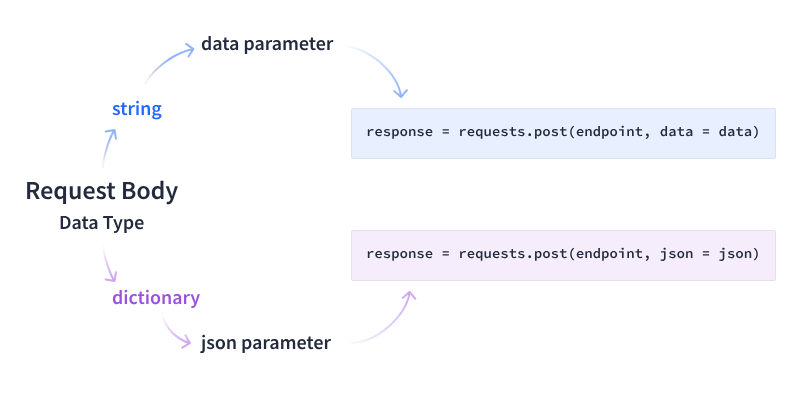

The following code example is also not a live-working endpoint but simply demonstrates how to construct a POST call. We cannot make any POST calls using the free and open ExchangeRate-API endpoints. API providers offering open access endpoints will typically have restricted access to their POST methods for security reasons. Allowing unrestricted POST requests from any unregistered user could lead to unauthorized modification of the server's data, posing a security risk.

Since we cannot practice using POST calls directly, we have simulated what a POST call would look like using the ExchangeRate-API:

In [ ]:
import requests

url = 'https://api.exchangerate-api.com/v4/convert'

# Specify the parameters for the POST request
payload = {
    'from': 'USD',         # Convert from USD
    'to': 'EUR',           # Convert to EUR
    'amount': 100          # Specify the amount to convert
}

response = requests.post(url, json=payload)

data = response.json()

In the above code, there is a parameter, or a value being passed to the endpoint, called json that is set to the payload we want to send to the server. We used the json parameter since our payload variable is a dictionary.

Continuing with our POST example, we are sending the following information in our payload dictionary:

- The currency we want to convert from
- The currency we want to convert to
- The amount we wanted to be converted

On the server side, the server or API endpoint processes the request body to extract and handle the data that was sent. The server may parse the data based on the specified content type and perform actions such as storing the data in a database, updating records, or triggering other code logic based on the received information. In this simulated example, the server side would perform some logic like retrieving the USD conversion rates, specifically the rate for EUR, and then taking the amount and multiplying it by the conversion rate. This would then get sent back in the form of an HTTP response. The JSON response may resemble something like this:

In [15]:
{
    "result": 93.43
}

{'result': 93.43}

We can unbundle the response by first converting the response to a dictionary using json() and then accessing the key result in the dictionary to get the final converted amount:

In [ ]:
response = requests.post(url, json=payload)

data = response.json()
converted_amount = data['result']
print(converted_amount)

## Converting JSON Data to Strings

On the previous screen, we set the json attribute in the requests.post() call to send our payload dictionary data.

We could have instead used the data attribute by converting our payload dictionary into a string first. The json module that we have previously introduced has a command called dumps() that lets us do just this:

In [16]:
import json
import requests

url = 'https://api.exchangerate-api.com/v4/convert'

# Specify the parameters for the POST request
payload = {
    'from': 'USD',         # Convert from USD
    'to': 'EUR',           # Convert to EUR
    'amount': 100          # Specify the amount to convert
}

payload_str = json.dumps(payload)
print(payload_str)
print(type(payload_str))
response = requests.post(url, data=payload_str)

{"from": "USD", "to": "EUR", "amount": 100}
<class 'str'>


The json.dumps() command takes our payload dictionary and returns a string representation of that dictionary in JSON format. When we print the type that is returned after calling json.dumps(), we get back a str type. Once our payload is converted to a string, it can then be passed into the data attribute in the requests.post() call.

Using json.dumps() is particularly useful when an API specifically requires JSON-formatted string data in the request body.

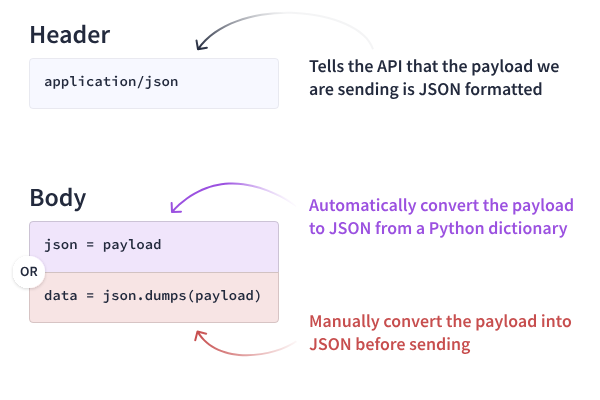

In case you are wondering what some of the use cases are for when to use the data attribute versus the json attribute in the POST call, here are a few:

You can use the data attribute when:

- The API expects the request payload to be in a format other than JSON, like form data encoded in a string format.
- When sending a string or bytes-like object as the payload.
- Example data: Form data or file uploads.

You can use the json attribute when:

- The API expects the request payload to be in JSON format.
- You want to automatically serialize a Python object (like a dictionary or list) into JSON format.
- Example data: Sending a Python dictionary to an API that accepts JSON payloads.

In [17]:
import json

exchange_rate_map = {
    'EUR': 0.927,
    'USD': 1,
    'CAD': 1.33,
    'JPY': 139.9,
    'GBP': 0.794
}

exchange_rate_map_str = json.dumps(exchange_rate_map)
print(exchange_rate_map_str)
print(type(exchange_rate_map_str))
print(type(exchange_rate_map))

{"EUR": 0.927, "USD": 1, "CAD": 1.33, "JPY": 139.9, "GBP": 0.794}
<class 'str'>
<class 'dict'>


## Formatting Strings

In Python, there's a powerful tool called f-strings (also known as "formatted string literals") that allows us to embed expressions inside string literals, using curly braces {}. This makes it easier to construct and manipulate strings.

The syntax of an f-string is straightforward: prefix the string with a lowercase f or an uppercase F before the opening quotation mark. Within the string, any expressions placed within curly braces {} are evaluated and replaced with their results.

Let's look at how we can use this with our API calls:

Let's say we want to convert from one specific currency to another and we want to make these currencies dynamic. We can use f-strings to construct our API URL endpoint.

In [18]:
base_currency = 'USD'

url = f'https://api.exchangerate-api.com/v4/latest/{base_currency}'
print(url)

https://api.exchangerate-api.com/v4/latest/USD


In this example, base_currency is a variable. By using f-strings, we can construct the URL to fetch the conversion rates for a currency without having to manually edit the URL each time.

F-strings can also be used when constructing the payload for a POST request. For example:

In [19]:
base_currency = 'USD'
target_currency = 'EUR'
amount_to_convert = 100

payload = f'{{"from": "{base_currency}", "to": "{target_currency}", "amount": {amount_to_convert}}}'
print(payload)

{"from": "USD", "to": "EUR", "amount": 100}


This code creates a JSON-formatted string that includes variable content, using f-string formatting. It's important to use double curly braces {{}} when you want to include a literal brace character in the formatted string.

Please remember that although f-strings can be very useful for string formatting, the json.dumps() function is often a better choice when working with more complex data structures because it automatically handles special characters and escape sequences.

In [20]:
import requests

currencies = ['EGP', 'GMD', 'CLP']
base_url = "https://api.exchangerate-api.com/v4/latest/"

for currency_code in currencies:
    url = f"{base_url}{currency_code}"
    response = requests.get(url)
    response = response.json()
    print(response['rates']['USD'])

0.0203
0.0143
0.00106


##  HTTP Request Error Handling

We were previously able to make successful HTTP requests because we retrieved valid and expected HTTP responses that represented all of our currency exchange rates. There are times, however, when we do not receive a successful response from the server. Checking for these errors is important because it allows us to gracefully handle the error so that the users of our application can be informed of what went wrong in a way that they understand.

When we initiate an HTTP request, we get back an HTTP response. This response contains an attribute, or a specific piece of information or property associated with the response, called status_code that indicates the outcome of the request. Here are a few example status codes:



Code	Status	Description
200	OK	Successful request
201	Created	Successful request, new resource created (occurs with a PUT request)
400	Bad Request	Request syntax or parameters are incorrect
401	Unauthorized	Authentication required or credentials are invalid
404	Not Found	Requested resource does not exist (for example, the endpoint does not exist
500	Internal Server Error	An error occurred on the server side

We can access the response status code by running the following lines of code:

In [21]:
import requests

endpoint = 'https://api.exchangerate-api.com/v4/latest/usd'

# Make a GET request to the API endpoint
response = requests.get(endpoint)
print(response.status_code)

200


We can use if/elif/else statements to check the response and print appropriate messages for each.

In [23]:
import requests

endpoint = 'https://api.exchangerate-api.com/v4/latest/usd'

# Make a GET request to the API endpoint
response = requests.get(endpoint)
if response.status_code == 200:
    print("Request was successful!")
elif response.status_code == 404:
    print("Endpoint not found. Please check the currency code provided in the endpoint.")
else:
    print("Something went wrong.")

Request was successful!


In [25]:
import requests

currency_codes = ['cad', 'abc']
base_url = "https://api.exchangerate-api.com/v4/latest/"

for currency_code in currency_codes:
    url = f"{base_url}{currency_code}"
    response = requests.get(url)
    if response.status_code == 200:
        print("Request was successful!")
    elif response.status_code == 404:
        print("Endpoint not found!")
        

Request was successful!
Endpoint not found!


In this lesson, we learned what APIs (Application Programming Interfaces) are and how they are used in programming and applications. We discussed how HTTP requests are made using two methods (GET and POST), how HTTP responses are returned and converted into dictionaries, and how to use the requests library to send and receive API data.

## Introduction to Query Parameters in APIs

Welcome to this lesson on Optional Query Parameters and Data Filtering! In an earlier lesson, we covered the basics of APIs and the Python requests library, including how to send HTTP requests, retrieve data from APIs, and handle errors. This foundational knowledge sets the stage for our next topic: optional query parameters in API interactions, a concept crucial not only in APIs but also in the world of Large Language Models (LLMs) like ChatGPT.

We'll explore the significance of query parameters and data filtering techniques, focusing on their applications in APIs and LLMs. We'll start by understanding the role of optional query parameters in refining API requests to retrieve specific data sets. This concept mirrors the way LLMs process and analyze vast datasets, often encompassing billions of parameters, to understand and generate human-like text based on specific contexts or user queries.

## Large Language Models and Data Filtering:

LLMs like ChatGPT are trained on extensive datasets to grasp the nuances of human language and generate relevant responses. When you prompt ChatGPT with a question, such as 'Explain the theory of relativity,' it filters through its dataset to find and compile information that aligns with your request. This process is analogous to using query parameters in an API to extract a subset of data from a larger dataset. Just as you might use a filter_by parameter (as we will see on the next screen) in an API to get data about a specific country or topic, ChatGPT uses its trained parameters to filter and generate a context-specific response. In both cases, the underlying concept involves selecting the most relevant information from a large pool of data to meet the specific needs of the query.

Understanding how query parameters work in API interactions provides valuable insights into the principles underlying LLMs' data processing and response generation. As we explore these concepts, you'll gain a deeper appreciation for the complexity and power of both APIs and LLMs in handling and interpreting vast amounts of information.

## Further Exploration of Query Parameters in APIs

Having introduced the concept of query parameters and their relevance in both API interactions and Large Language Models, let's now take a closer look at how these parameters work in a more familiar context.

We will focus on the World Bank's Development Indicators, a comprehensive database containing detailed global development data for over 200 countries, some dating back more than 50 years. To enhance our interaction with this extensive resource, we have built a dedicated side server featuring our own APIs(https://api-server.dataquest.io/economic_data). This setup will provide streamlined access to the database, allowing us to efficiently utilize these valuable indicators in our coursework.

In the world of APIs, we often want to do something similar. Rather than retrieving all the data an API offers, we might want only a subset of that data. This is where optional query parameters come in. They allow us to specify or filter the data we want from an API, much like adding specific instructions to our burger order.

Optional query parameters allow us to select a subset of data from an API, rather than retrieving everything it offers. For instance, to filter data to only include countries in Sub-Saharan Africa, we use a query parameter in the URL, like https://api-server.dataquest.io/economic_data/countries?filter_by=region=Sub-Saharan%20Africa.

The World Development Indicators API supports these parameters, enabling refined searches. It has several endpoints, including /countries, /indicators, /country_series, /series_time, /footnotes, and /historical-data.

To illustrate, sending a GET request to the API without query parameters looks like this:

In [36]:
import requests

response = requests.get("https://api-server.dataquest.io/economic_data/countries")
data = response.json()

In [37]:
# data

The data variable now holds a list of all countries in the database. However, if we are specifically interested in countries within a certain region, such as Sub-Saharan Africa, we need to utilize query parameters to refine our request. It's important to understand that not every API will accept the same query parameters, which is why consulting the API's documentation is essential. In our case, our API supports the filter_by parameter, which allows for more targeted searches.

We can modify our request to include this parameter:

In [38]:
response = requests.get("https://api-server.dataquest.io/economic_data/countries?filter_by=region=Sub-Saharan%20Africa")
data = response.json()

In [40]:
type(data)

str

Here, the filter_by=region=Sub-Saharan%20Africa segment in the URL is a query parameter where:

- ? is a delimiter that marks the beginning of the query string. It separates the path of the URL from the parameters that are being passed.

- filter_by indicates the type of filtering we are applying.

- region is a specific field in the API's database that we want to filter by. In this context, region refers to the geographical area of the countries.

- The first = sign following filter_by is used to assign the filtering criteria (region in this case), and the second = sign assigns the specific value (Sub-Saharan Africa) to the region field.

- %20 is URL encoding for a space character, necessary because URLs cannot contain actual space characters. However, when composing a GET request in an editor or a tool, you don't need to manually type %20 for spaces; it is typically handled automatically by the software.

Now, the data variable holds a list of countries specifically in the Sub-Saharan Africa region. This demonstrates how query parameters can be effectively used, when supported by an API, to refine data requests according to our requirements.

In [42]:
import requests

response = requests.get("https://api-server.dataquest.io/economic_data/countries?filter_by=region=South%20Asia")

region_south_asia = response.json()
# print(region_south_asia)

## Multiple Query Parameters

On the previous screen, we learned about query parameters and their role in refining data requests to APIs. Let's continue applying this concept in a practical scenario, where we require specific data from the World Development Indicators API, particularly from the /indicators endpoint. This endpoint has various fields like topic, indicator_name,series_code, source, periodicity and long_name.

Imagine we need to analyze indicators related to the topic, "Environment: Agricultural production" and also wish to gather data with series_code, "G.AGR.TRAC.NO". To achieve this, we can use multiple query parameters in our API request to filter the data more precisely.

For instance, a GET request to the /indicators endpoint with two query parameters would look like this:

In [44]:
import requests

response = requests.get("https://api-server.dataquest.io/economic_data/indicators?filter_by=topic=Environment:%20Agricultural%20production&filter_by=series_code=AG.AGR.TRAC.NO")
data_str = response.json()
# print(data_str)

Note that, for titles like 'Economic Policy & Debt,' which contain an ampersand (&), we use %26 instead, as it is the URL encoding for an ampersand (&) for proper API interpretation. The & we see before the second filter_by is the character used to combine other query parameters. This precise structuring of parameters directs the API to return data specifically relevant to the chosen topic and series code.

Looking at the data_str variable, we can see that it's a string format that represents a JSON array. This JSON string needs to be parsed into a Python object (specifically a list of dictionaries) to allow for data manipulation and extraction. Here's how we can approach it:

In [46]:
import json
# Parse the JSON string into a Python list of dictionaries
data = json.loads(data_str)
# data

Once parsed, we can access the information in the same way as we would with a list of dictionaries. For example, if we want to extract details about "Agricultural machinery, tractors", we can loop through the list and find the relevant dictionary.

In [47]:
for indicator in data:
    if indicator['indicator_name'] == "Agricultural machinery, tractors":
        # Extract and print the desired information
        print(f"Topic Name: {indicator['topic']}")
        print(f"Indicator Name: {indicator['indicator_name']}")
        print(f"Long Definition: {indicator['long_definition']}")
        # Assuming we only need the first match, we can break the loop after finding it
        break

Topic Name: Environment: Agricultural production
Indicator Name: Agricultural machinery, tractors
Long Definition: Agricultural machinery refers to the number of wheel and crawler tractors (excluding garden tractors) in use in agriculture at the end of the calendar year specified or during the first quarter of the following year.


This code filters through the returned data to locate the indicator "Agricultural machinery, tractors" and extract relevant details about it. It demonstrates how we can combine the use of query parameters with Python's data processing capabilities to efficiently obtain the exact data we need.

Recall in our previous prompt to ChatGPT, "Explain the theory of relativity," where we used a single query. In scenarios requiring multiple query parameters, we're looking for more than one specific filter in our API request. This is similar to how a more complex ChatGPT prompt might require the model to integrate and filter multiple pieces of information. For instance, if we asked ChatGPT about the impact of the theory of relativity on modern physics and space exploration, the AI would need to filter through its dataset for relevant information on both topics, similar to using multiple filter_by parameters in an API.

By mastering the use of multiple query parameters and Python for data manipulation,we are equipped to make precise and efficient API requests, a valuable skill in data analysis and API interaction.

In [48]:
import requests
import json

response = requests.get("https://api-server.dataquest.io/economic_data/indicators?filter_by=topic=Health:%20Risk%20factors&filter_by=periodicity=Biennial")
topic_str = response.json()

topic = json.loads(topic_str)
# print(topic)
for row in topic:
    print(row["series_code"])
    print(row["indicator_name"])
    break

SH.PRV.SMOK
Prevalence of current tobacco use (% of adults)


## Handling Invalid Parameter Values

In our exploration of API data requests, particularly with the World Development Indicators API’s /indicators endpoint, an essential aspect to grasp is the impact of using incorrect or unsupported fields in our queries. This is a common issue that can lead to errors or unanticipated responses from the API.

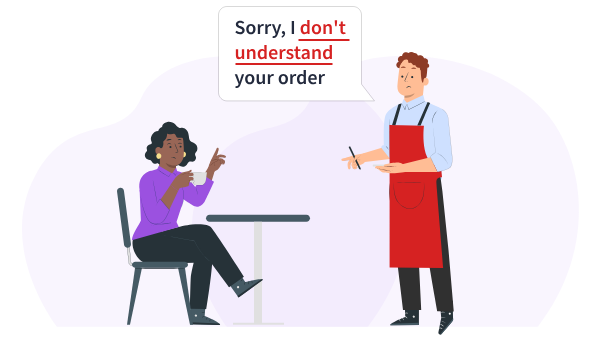

To illustrate, let’s consider an example where we mistakenly use an unsupported field in our request to the /indicators endpoint. Suppose we make a request using the field indicator_topic, which does not exist in this API:

In [49]:
import requests

response = requests.get("https://api-server.dataquest.io/economic_data/indicators?filter_by=indicator_topic=Health: Risk factors")
data_str = response.json()
print(data_str)

{'detail': 'Invalid filter_by parameter, please ensure that only fields available in schema are specified.'}


The above request includes an invalid parameter (indicator_topic=Health: Risk factors). When we run this code, we received an error message instead of the data we expected.

It's crucial to understand how to handle situations like these because they're common when working with APIs. APIs can have complex structures and specific requirements, and it's easy to make a mistake when crafting our requests.

Just like LLMs, which are trained on a finite set of parameters and data, they can struggle or give unexpected responses when queried with prompts that fall outside these parameters. For example, asking an LLM like ChatGPT a question based on a false premise, like the collaboration between Einstein and Newton, can lead to incorrect or nonsensical answers. This is because the model's training doesn't include data to handle such historically inaccurate scenarios. We have to align queries with the model's training scope for accurate responses.

When we encounter an error, our first step should be to check the API's documentation to understand the valid parameters and their expected values. If the error persists, we can use the error message to troubleshoot the issue. In many cases, the error message will provide clues about what went wrong and how to fix it.

Now, let's put this into practice.

## Error Handling in API Requests

When working with APIs, encountering errors is a common occurrence. These errors can arise from various causes, such as incorrect URLs, invalid or missing parameters, or server-side issues.

Recall from earlier that making a request to an API is like asking for a specific dish in a restaurant. Now, imagine that you're in a restaurant and you ask for a dish that's not on the menu. What happens? The waiter will likely tell you that the dish you're asking for isn't available, right?

Similarly, when we make a request to an API, we may not always get the response we expect. Sometimes, we might get an error message instead. As in our previous exercise, our API responded with the message {'detail': 'Invalid filter_by parameter, please ensure that only fields available in schema are specified.'}. This message indicates that something was incorrect in the request. However, not all APIs are equipped with such descriptive responses. In this section, we will learn how to manage these errors effectively.



In Python programming, these errors can be managed using try/except blocks. When code within a try block encounters an error, Python shifts to the except block, allowing the programmer to handle the error or provide alternative instructions. This mechanism ensures that the program can gracefully manage unexpected situations or errors during execution.

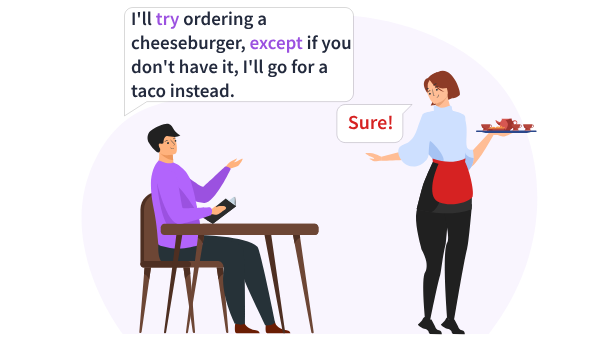

In the context of API requests, we can use a try/except block to handle potential errors like this:

In [ ]:
import requests

try:
    response = requests.get('api-server.dataquest.io/economic_data/historical_data?filter_by=country_code=PAK&indicator_code=SP.POP.TOTL&year=2017')
    data = response.json()
    print(data)
except Exception as e:
    print("An error occurred with the request:", e)

In the above code, we've enclosed our request in a try block. If the request fails for any reason, Python will execute the code in the except block and print an error message. Do you understand why this API request failed? Read the output to try and understand.

Like handling errors in API requests, managing inaccurate prompts in Large Language Models (LLMs) involves interpreting and responding to the information within their training limits. When an LLM receives a prompt that is unclear or based on incorrect information, it uses its trained algorithms to decipher and respond to the query as accurately as possible. However, if the prompt is outside the scope of its training or based on false premises, the response may be less accurate or relevant. This situation is comparable to an API generating an error when receiving a request with invalid parameters. Both scenarios emphasize the need for precise and accurate input to achieve the desired output or response.

Learning to interpret error messages is an invaluable skill. Messages like "Invalid URL: No scheme supplied" serve as clues, guiding you to identify and resolve the issue. Although it might seem challenging at first, understanding these messages is a key part of troubleshooting and will become more intuitive with practice. Let’s continue to develop these skills together.

## Pagination in API Requests

So far, we've learned how to use optional query parameters to filter our API data requests and handle errors when they arise. Now, let's explore another critical aspect of API usage: pagination.

Pagination in APIs is a technique used to divide the data into smaller, manageable segments or pages. This becomes crucial when dealing with APIs that contain large volumes of data. Without pagination, a request to an API might attempt to fetch all available data at once, which can be overwhelming and inefficient for both the client and the server.

By implementing pagination, we can control the volume of data received in each request. This is achieved by specifying the amount of data per 'page' and which 'page' or segment of data to retrieve.

While other APIs use page and per_page parameters for pagination, our side API server employs limit and offset. Here's how they work:

`Limit:` This parameter sets the number of records to return in a single response. It's akin to defining the 'size' of each page.

`Offset:` This parameter determines the starting point in the dataset, effectively 'skipping' a specified number of records before returning data.

For instance, if we want to access only 5 records of data from the World Development Indicators API, skipping the first 3 records, our request would look like this:

In [50]:
import requests

parameters = {
    "limit": 5,   
    "offset": 3  
}
response = requests.get("https://api-server.dataquest.io/economic_data/indicators", params=parameters)
data = response.json()

In [52]:
# data

Notice the additional argument params in our response. Let's break it down to have a better understanding:

params=parameters: In this case, params is an argument in the requests.get() method. It allows you to pass query parameters in the form of a dictionary to the URL. The variable parameters, contains these query parameters

In this example, the API will return records starting from the 4th record and include a total of 5 records. In other words, it will return the 4th to the 8th record in the dataset. Such a method of pagination is particularly effective for methodically processing or browsing through large datasets.

Keep in mind that not all APIs use the same parameter names for pagination, and some APIs may not support pagination at all. For example, some APIs might use startIndex and maxResults, while others could use cursor for more complex pagination schemes. Always refer to the API documentation to understand the specific pagination parameters and their usage.

In Large Language Models (LLMs), managing large datasets or responses can be analogous to the concept of pagination in APIs. LLMs, when processing extensive data or long texts, often need to segment this information into smaller, manageable parts for effective processing and response generation. This is similar to pagination in APIs, where data is divided into pages or segments to avoid overwhelming requests and to ensure efficient data retrieval. In LLMs, techniques akin to limit and offset might be employed to handle lengthy inputs or to generate responses in a structured manner, ensuring that the model stays focused and relevant to the prompt without being overloaded with information. This segmentation approach in both APIs and LLMs highlights the importance of structuring data processing to enhance efficiency and effectiveness.

In [54]:
import requests
import json

parameters = {
   
    "limit": 10,
     "offset": 0,
    
}
response = requests.get("https://api-server.dataquest.io/economic_data/countries", params=parameters)

data_with_pagination = json.loads(response.json())
# print(data_with_pagination)

## Implementing Pagination

On the previous screen, we introduced the concept of pagination in API data requests. Much like reading a book page by page, pagination allows us to systematically retrieve API data in segments, which is particularly beneficial when dealing with large datasets. It enables us to break down the data into manageable chunks, avoiding the inefficiency and overwhelming nature of trying to process everything at once.

For instance, in a typical API response supporting pagination, the structure might look like this:

In [55]:
{
    "page": 1,
    "per_page": 10,
    "total": 100,
    "total_pages": 10,
    "data": [...]
}

{'page': 1,
 'per_page': 10,
 'total': 100,
 'total_pages': 10,
 'data': [Ellipsis]}

In this example, total represents the total number of records available, and total_pages indicates the number of pages, calculated based on the per_page parameter.

When working with the World Development Indicators API, which has a substantial number of records, we use pagination parameters such as limit and offset for efficient data navigation. The limit parameter defines the number of rows to be returned in each request, while offset determines the starting point for data retrieval.

Here’s an example of how we can apply these parameters:

In [56]:
import requests

parameters = {
    "limit": 10,  
    "offset": 0  
}

response = requests.get("https://api-server.dataquest.io/economic_data/indicators", params=parameters)
data_str = response.json()
data=json.loads(data_str)

print("Total Records:", len(data))
print("Current Page Records:", data[0].get("topic", []))

Total Records: 10
Current Page Records: Environment: Agricultural production


In this code, limit is set to 10, so our API response will include 10 records. The offset is 0, corresponding to the first page of data.

Note that, data[0].get("topic", []) means: "Get the value associated with the keytopic from the first dictionary in data. If the key topic does not exist, return an empty list instead."

While the focus here is on limit and offset, it's important to note that different APIs might use various pagination methods. For instance:

Cursor-Based Pagination
Example with cursor-based pagination:


In [57]:
parameters = {
    "cursor": "abc123"
}

The API provides a cursor to fetch the next set of records.

Keyset Pagination

Example with keyset pagination:

In [58]:
parameters = {
    "start_after": "2021-01-01T12:00:00Z"
}

Here, start_after is the last record from the previous fetch.

Always check the API documentation to understand its specific pagination scheme. This will help you avoid unexpected behavior or incomplete data retrieval. Now, let's proceed to the exercise to implement what we've learned about pagination.

In [59]:
import requests
import json 

parameters = {
    "limit": 10,
    "offset":0
}

response = requests.get("https://api-server.dataquest.io/economic_data/indicators", params=parameters)

indicator_page_str = response.json()
indicator_page = json.loads(indicator_page_str)

indicator_len_records = len(indicator_page)

fourth_indicator_name = indicator_page[3].get("indicator_name")

print(indicator_len_records)
print(fourth_indicator_name)


10
Agricultural land (sq. km)


## Optimizing Pagination

In our previous discussions, we've explored the fundamentals of pagination in API requests. As we progress, it becomes crucial to focus on optimized pagination. This is about strategically fetching data in a way that minimizes the number of requests and reduces unnecessary data retrieval, thereby enhancing efficiency.

Imagine you're at a buffet. You have a plate to fill, but there's a catch ― the plate can only hold a certain amount of food at a time. You could go back and forth, picking up a little bit of everything. But that would be time-consuming, right? Instead, it would be more efficient to fill your plate with the dishes you like the most first, and then go back for the rest if there's space left. This is essentially what optimized pagination does. It helps you get the most valuable data first, reducing the number of requests you need to make.

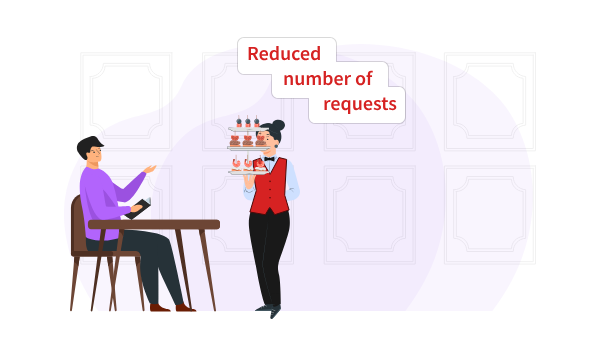

Optimized pagination in API interactions is primarily about making judicious choices regarding the limit and offset parameters. These parameters are instrumental in controlling both the volume and the specific segment of data you retrieve in each request.

For instance, let's consider an API that houses 100 records. If your requirement is to access only the first 30 records, optimization can be achieved by setting the limit to 30 and the offset to 0. This method efficiently retrieves all the needed records in a single request, rather than multiple requests for smaller chunks of data.

Here's how this can be practically implemented:

In [61]:
import requests
import json

# Setting optimized pagination parameters
parameters = {
    "limit": 30,  # Number of records to retrieve
    "offset": 0   # Starting point of the data retrieval
}

# Executing a GET request with optimized pagination
response = requests.get("https://api-server.dataquest.io/economic_data/indicators", params=parameters)
data_str = response.json()
data=json.loads(data_str)

# Displaying a record to verify the data
# print(data[0])  # Assuming 'data' is a list of records

In this example, the limit parameter is utilized to specify the exact number of records we intend to retrieve, while offset helps us define the starting point of our data retrieval. By fetching 30 records in one go, we significantly streamline our data retrieval process.

It's important to remember that the scope for optimization can differ from one API to another. Certain APIs might impose fixed limits on data retrieval or employ different methods for data navigation. Therefore, it's always recommended to refer to the API documentation for precise information on pagination capabilities and any existing limitations.

Equipped with this knowledge of optimized pagination, let's proceed to the next exercise where we'll apply these concepts.

In [62]:
import requests
import json

parameters = {
    "limit": 50,
    "offset": 0
}

response = requests.get("https://api-server.dataquest.io/economic_data/indicators", params=parameters)

data_page_1 = response.json()

data_page_1 = json.loads(data_page_1)

print(parameters["limit"])

print(data_page_1[0].get("topic"))

parameters = {
    "limit": 50,
    "offset": 50
}

response = requests.get("https://api-server.dataquest.io/economic_data/indicators", params=parameters)

data_page_2 = response.json()

data_page_2 = json.loads(data_page_2)

print(parameters["limit"])

print(data_page_2[0].get("topic"))


50
Environment: Agricultural production
50
Economic Policy & Debt: Balance of payments: Capital & financial account


## Combining Query Parameters and Pagination

On the previous screens, we've learned a lot about how to refine our API data requests using optional query parameters and how to manage large amounts of data using pagination. But what happens when we need to do both at the same time? Can we combine query parameters and pagination to fetch specific subsets of data efficiently? The answer is yes, and that's exactly what we're going to cover in this screen.

Consider a scenario where you're at a large library with thousands of books. You're looking for books on a specific topic, say, climate change (this is where query parameters come in). However, the books are arranged in such a way that only a certain number can be displayed at a time (this is where pagination comes in). In order to find what you're looking for, you'd need to use both the topic filter (query parameter) and the book display limit (pagination).

The same applies to APIs. Sometimes we need to both refine our data requests (using query parameters) and manage large amounts of data (using pagination) at the same time. And just like in the library scenario, we can combine query parameters and pagination in our API requests.

Let's see how we can implement this in Python using the requests library:

In [63]:
import requests
import json


parameters = {
    "filter_by":"currency_unit=Euro,income_group=High income",
    "limit": 5,
    "offset": 0
}


response = requests.get("https://api-server.dataquest.io/economic_data/countries", params=parameters)
data_str = response.json()
data = json.loads(data_str)

for record in data:
    print(record.get("country_code"))

AND
AUT
BEL
CYP
DEU


In this example, we've combined multiple query parameters and pagination into a single API request to retrieve specific data. The request aims to fetch countries that meet two criteria: those using the Euro as their currency unit (currency_unit: "Euro") and those classified as high-income nations (income_group: "High income"). These filters are combined in the filter_by parameter, separated by a comma, which allows for multiple filtering conditions in one request.

For pagination, the limit is set to 5, and the offset is 0. This means the request will return the first 5 records from the dataset, starting from the very beginning. Essentially, the API is asked to return the first five countries that match both of our specified criteria: using the Euro and being high-income nations.

After receiving the response, the script converts the JSON response into a Python list and prints the country codes for the first 5 records. This approach efficiently filters and paginates data, showcasing how to extract targeted information from an API

By combining query parameters and pagination, we can fetch specific subsets of data more efficiently, saving us a lot of time and resources, especially when dealing with large datasets.

In [64]:
import requests
import json

parameters = {
    "filter_by":"region=Europe & Central Asia,income_group=Upper middle income",
    "limit": 5,
    "offset": 0
}

response = requests.get("https://api-server.dataquest.io/economic_data/countries", params=parameters)

data_combined_str = response.json()
data_combined = json.loads(data_combined_str)
# print(data_combined)
for row in data_combined:
    country_name = row.get("table_name")
    print(country_name)


Albania
Armenia
Azerbaijan
Bulgaria
Bosnia and Herzegovina


## Pagination with Page and Page_Number in API Requests

In our previous lessons, we've extensively explored the use of limit and offset for pagination, understanding how to effectively apply these parameters in API requests. Different APIs, however, may adopt various approaches to pagination. This lesson introduces another common pagination method used by many APIs: the use of page and page_number.

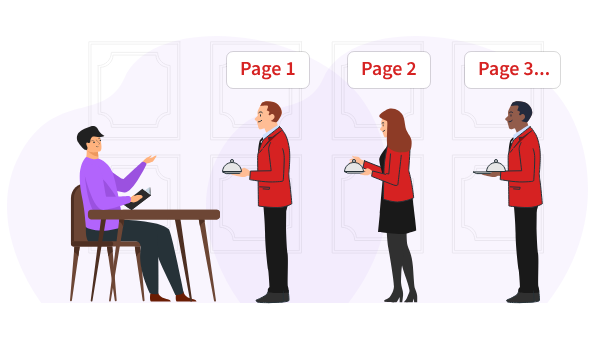

This method simplifies the process of navigating through large datasets. While limit and offset directly control the number of records returned and the starting point in the dataset, page and page_number provide a more intuitive way to access data, akin to flipping through pages of a book.

Let's put these new concepts into action, assuming our API (the World Development Indicators API) supports page and page_number for pagination. This approach offers a more intuitive method for navigating large datasets, similar to flipping through pages of a book or a report. We'll now apply this method in a real-world scenario to see how it enhances our ability to manage and retrieve data efficiently.

Here's how we can adapt our request to the World Development Indicators API with these pagination parameters:

In [66]:
import requests


# Set base URL and endpoint
base_url = "https://api-server.dataquest.io/economic_data"
endpoint = "/historical_data"

# Set query parameters with pagination
parameters = {
    "country_code": "IND",
    "indicator_code": "SP.POP.TOTL",
    "from_year": 2000,
    "to_year": 2020,
    "page": 1,         # Current page number
    "page_number": 50  # Number of records per page
}

# Send GET request
response = requests.get(base_url + endpoint, params=parameters)
data = response.json()

In [67]:
data

{'detail': 'Not authorized'}

In [68]:
# # Print first 5 records
# print(data["records"][:5])

# # Handling total number of records
# total_records = data["total"]
# print(f"Total records available: {total_records}")

In this script, we've set up an API request to fetch specific historical data:

The country_code parameter is set to "IND", targeting data related to India.
The indicator_code is "SP.POP.TOTL", which typically refers to a specific statistical indicator, like total population in this case.
The from_year and to_year parameters specify the time range for the data, from the year 2000 to 2020.
For pagination, the script uses two key parameters:

page: This parameter indicates the current page number within the dataset. In this example, it's set to 1, meaning the first page of the dataset is being accessed.
page_number: This parameter specifies the number of records to display per page. Here, it's set to 50, indicating that each page will contain 50 records.
This pagination method, using page and page_number, offers a user-friendly approach to accessing large datasets. It simplifies data retrieval by abstracting away the need for calculating offsets (as required in limit and offset pagination). Instead, you directly specify which page number to access and how many records that page should contain.

After sending the GET request, the script prints the first 5 records. It then retrieves and prints the total number of records available for the query, stored under the key total in the response. This is a common feature in APIs providing paginated data, where the total count of available records across all pages is given, offering a comprehensive view of the data's scope. Such information is useful for understanding the dataset's extent and for planning subsequent data retrieval and navigation through the pages.

Great work! In this lesson, we explored the power of APIs, starting with basic GET requests to the World Development Indicators API and learning how to use optional query parameters for efficient and targeted data retrieval.

We began by understanding the role of optional query parameters in refining API requests, using the analogy of specifying details when ordering food at a restaurant. This included an example of filtering data for specific countries in Sub-Saharan Africa using the World Development Indicators API. We then advanced to leveraging multiple filters in an API request to obtain more precise data, and explored parsing JSON strings into Python objects for thorough data analysis.

We also addressed the common issue of using incorrect query parameters, using examples from the World Development Indicators API to illustrate potential errors and the importance of consulting API documentation for correct parameter usage. This led us to the concept of error handling in API interactions, where we compared API requests to restaurant orders and introduced Python's try/except blocks as a method for managing errors and ensuring continued program execution.

Finally, we focused on pagination as a vital technique for handling large data sets from APIs. We discussed the significance of pagination parameters like limit and offset, drawing a parallel to reading a book page by page. We emphasized the need for optimizing pagination for efficient data fetching, similar to making smart choices at a buffet. This included integrating query parameters with pagination techniques for handling extensive datasets and introduced an alternative pagination strategy using page and page_number for easier navigation through large datasets, as demonstrated in the World Development Indicators API.

In the next lesson, we will now shift our focus to authentications and rate limits.